In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import pickle
import math as ma

In [56]:
with open('cloudsat_cloud_info_0615.pkl', 'rb') as f:
    clouds = pickle.load(f)
with open('cloudsat_cluster_info_0615.pkl', 'rb') as f:
    hca = pickle.load(f)
typenum=5

In [57]:
#0 granual  1 julian 2 cloud num 3 lat 4 lon 5 size 6 top  7 bot 8 landsea 
#9  0dbz mask  10 0dbz h   11 10dbz mask  12 10dbz h 13edge 14 edge 15 hori  16 system

print(clouds.shape)
print(hca.shape)

(113447, 17)
(113447,)


In [58]:
a=1
kkk=clouds[0:113447,:]
#print(kkk[hc.labels_==a,3])
#print(kkk[hc.labels_==a,4])
latrange=(kkk[:,3]+26)/2
lonrange=(kkk[:,4]-70)/2

for i in range(0,8296):
    latrange[i,]=ma.floor(latrange[i,])
    lonrange[i,]=ma.floor(lonrange[i,])
print(latrange[hca==a,])
aa=latrange.astype(int)
print(aa[hca==a,])
#print(lonrange[hc.labels_==a,])
#print(latrange[hc.labels_==i,])
#print(kkk[hc.labels_==i,0])


[22.    19.    19.    ...  7.27   8.105 13.725]
[22 19 19 ...  7  8 13]


In [59]:

a=4
dayrange=(kkk[:,1])/10
aa=dayrange.astype(int)
print(aa[hca==a,])


[16 16 17 ... 35 35 35]


In [60]:
for i in range(0,typenum):
    print('type=',i)

    pre_selectcloud=kkk[hca==i,:]
    final_selectcloud=pre_selectcloud[pre_selectcloud[:,9]==1,:]
    print(sum(final_selectcloud[:,11]))
    eventnum=np.sum(hca==i)
    print(eventnum)


type= 0
5962.0
11806
type= 1
0
63072
type= 2
0.0
16812
type= 3
19264.0
19264
type= 4
2103.0
2493


[1. 1. 1. ... 1. 1. 1.]
[1. 0. 1. ... 1. 1. 0.]


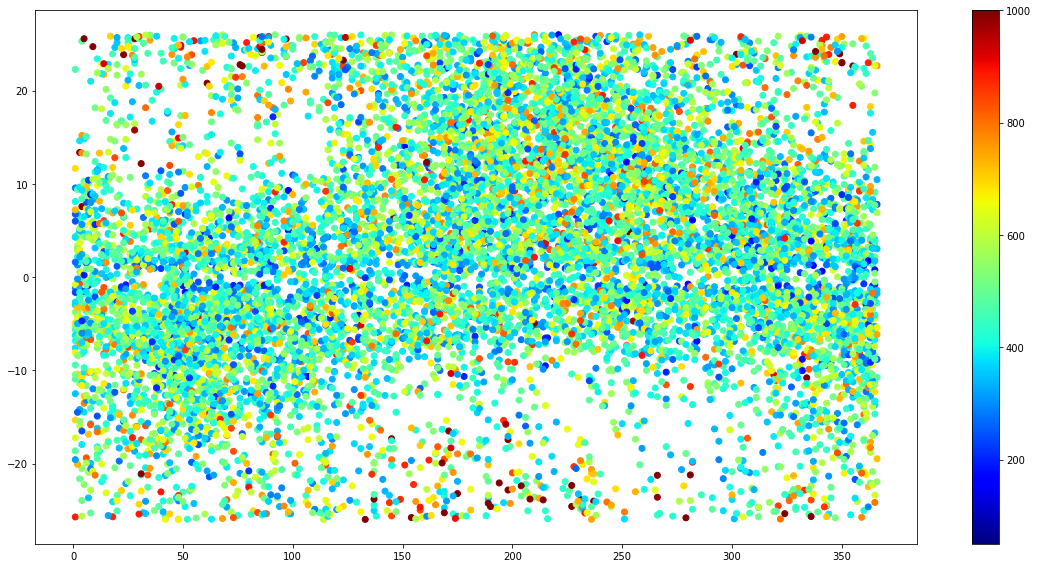

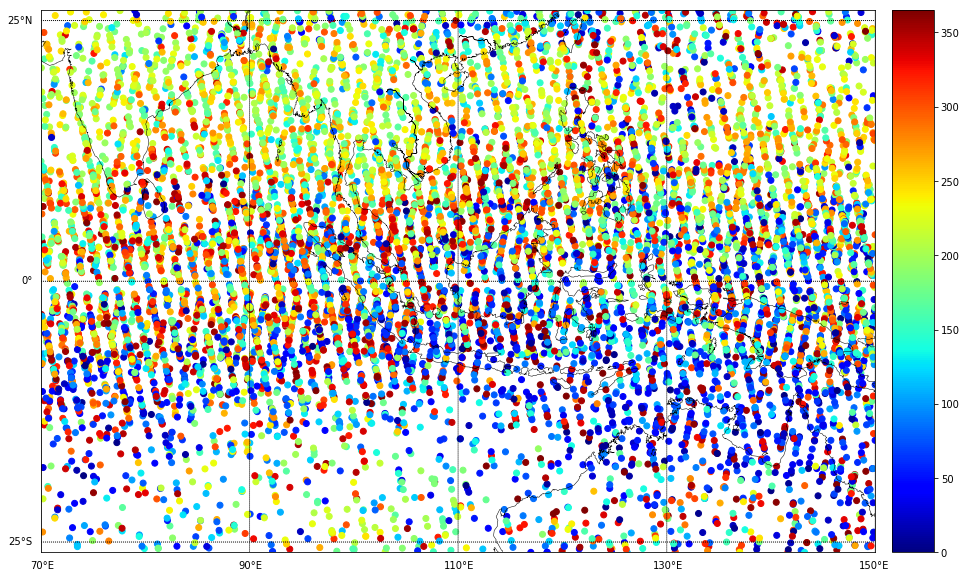

In [97]:
#aa=plt.scatter(final_selectcloud[:,12],final_selectcloud[:,6],c=final_selectcloud[:,15], cmap=plt.cm.get_cmap('jet'),vmin=50,vmax=1000)
i=0
fig = plt.figure(figsize=(16,8)) 
aa=plt.scatter(kkk[hca==i,1],kkk[hca==i,3],c=kkk[hca==i,15], cmap=plt.cm.get_cmap('jet'),vmin=50,vmax=1000)
plt.colorbar(aa)
plt.tight_layout()
print(kkk[hca==i,9])
print(kkk[hca==i,11])
#fig = plt.figure(figsize=(12,8)) 
#aa=plt.scatter(kkk[hca==i,1],kkk[hca==i,4],c=kkk[hca==i,15], cmap=plt.cm.get_cmap('jet'),vmin=50,vmax=1000)
#plt.colorbar(aa)

np.set_printoptions(suppress=True) 
fig = plt.figure(figsize=(16,12)) 
m = Basemap(llcrnrlon=70, urcrnrlon=150., llcrnrlat=-26., urcrnrlat=26.,resolution='l')
m.drawcoastlines(linewidth=0.5)
#m.drawparallels(np.arange(-100., 120., 25.), labels=[1, 0, 0, 0])
m.drawparallels(np.arange(-100., 120., 25.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-170., 171., 20.), labels=[0, 0, 0, 1])
m.scatter(kkk[hca==i  ,4], kkk[hca==i ,3] , c=kkk[hca==i ,1] ,cmap=plt.cm.get_cmap('jet'), vmin=0,vmax=365)
m.colorbar()
#m.scatter(final_selectcloud[:,4], final_selectcloud[:,3] , c=final_selectcloud[:,15] ,cmap=plt.cm.get_cmap('jet'), vmin=50,vmax=1000)

In [7]:
#0 granual  1 julian 2 cloud num 3 lat 4 lon 5 size 6 top  7 bot 8 landsea 
#9  0dbz mask  10 0dbz h   11 10dbz mask  12 10dbz h 13edge 14 edge 15 hori  16 system

0.0008814688797412006
[223. 227. 248. 266. 268. 252. 265. 245. 307. 327. 340. 366. 322. 363.
 324. 320. 324. 294. 304. 320. 299. 281. 312. 279. 252. 252. 275. 265.
 266. 324. 294. 263. 300. 339. 332. 308. 300. 323. 311. 326.]
0.0008814688797412006
[1118. 1163. 1258. 1362. 1303. 1225. 1299. 1204. 1258. 1319. 1356. 1424.
 1455. 1595. 1805. 1703. 1555. 1456. 1346. 1288. 1398. 1534. 1635. 1553.
 1521. 1756. 1631. 1785. 1705. 1771. 1886. 1834. 1923. 1874. 2032. 2028.
 2001. 1998. 1882. 1833.]
0.0008814688797412006
[304. 323. 317. 346. 338. 301. 368. 369. 358. 411. 382. 407. 403. 476.
 454. 450. 422. 425. 420. 399. 418. 452. 470. 410. 425. 476. 420. 473.
 438. 430. 465. 461. 481. 474. 476. 473. 464. 485. 436. 512.]
0.0008814688797412006
[275. 313. 349. 343. 353. 418. 372. 393. 428. 404. 411. 424. 463. 483.
 526. 548. 591. 518. 539. 492. 491. 515. 528. 570. 489. 571. 594. 539.
 531. 524. 576. 500. 528. 537. 503. 559. 581. 494. 489. 502.]
0.0008814688797412006
[62. 58. 50. 50. 38. 51. 58. 76. 

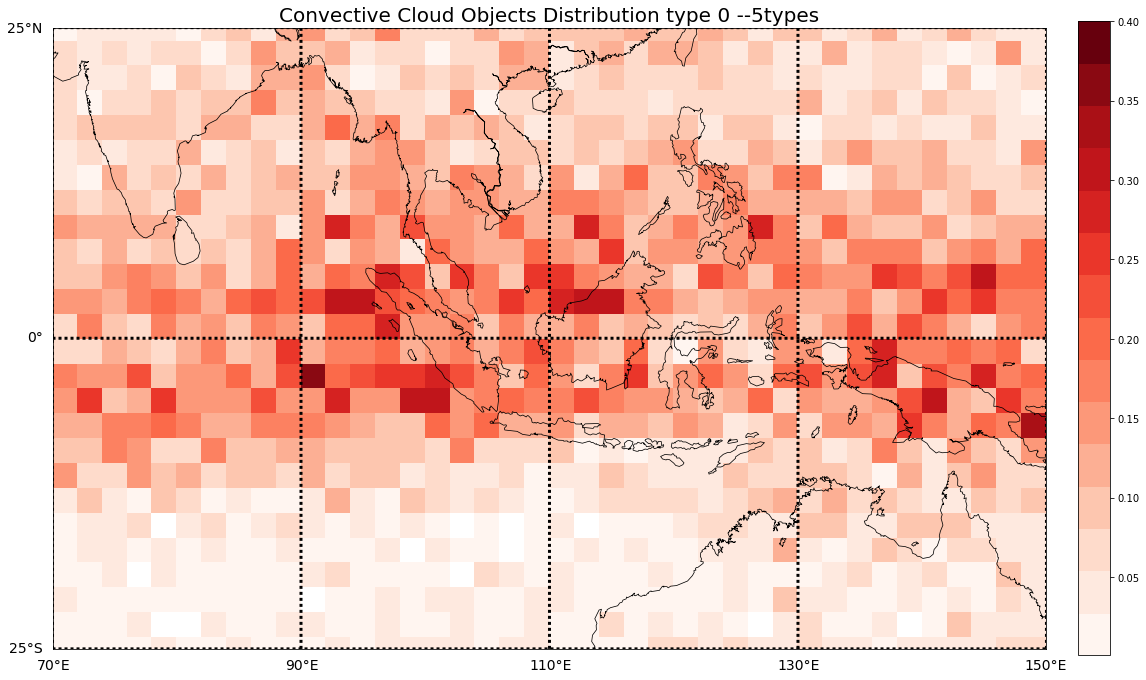

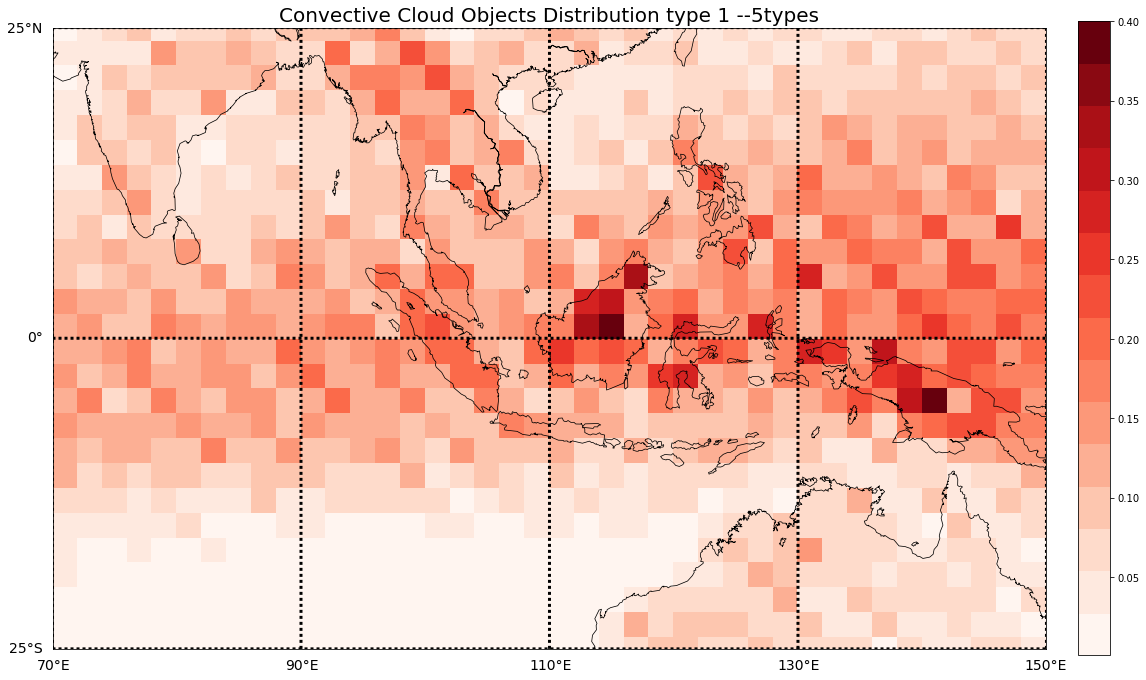

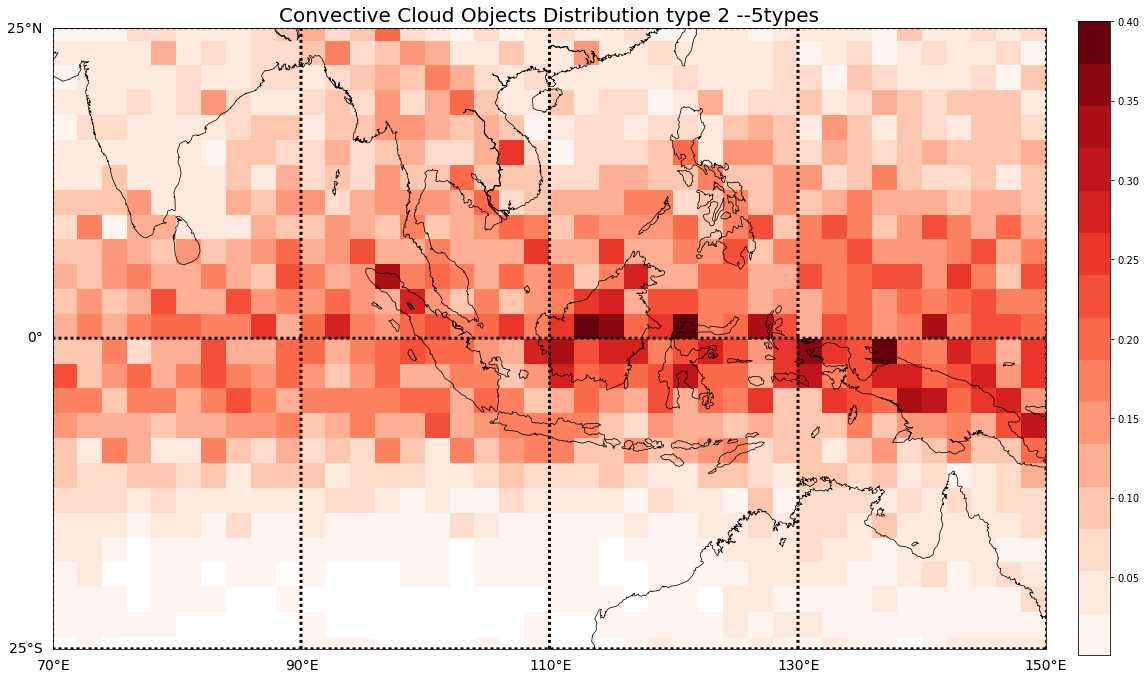

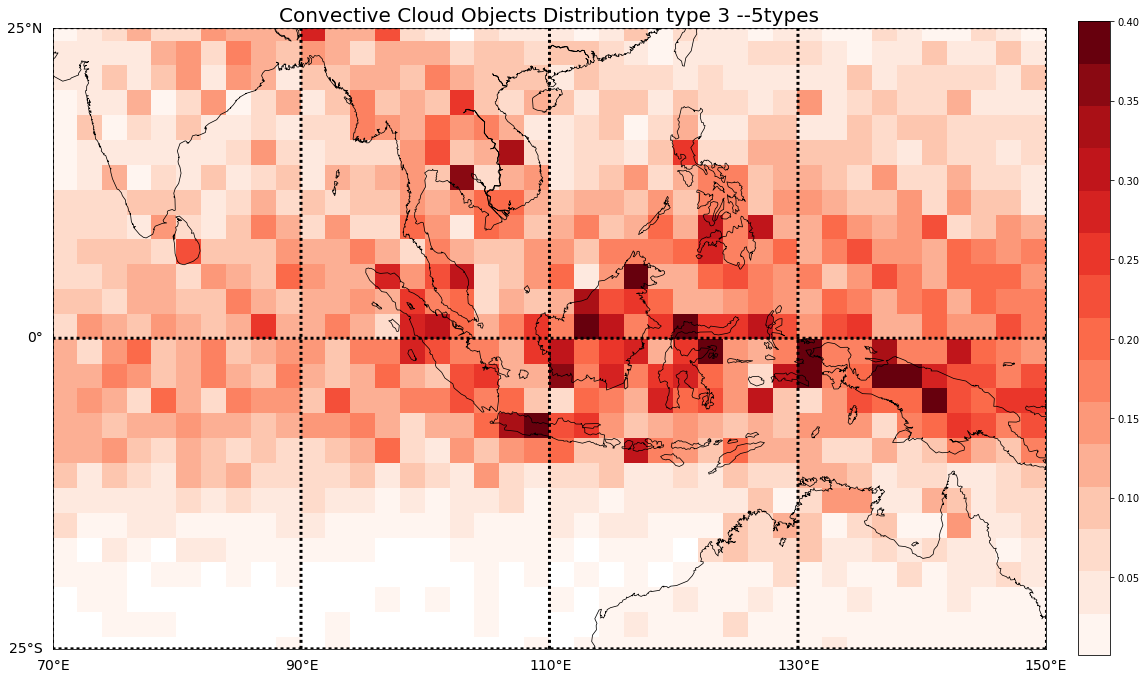

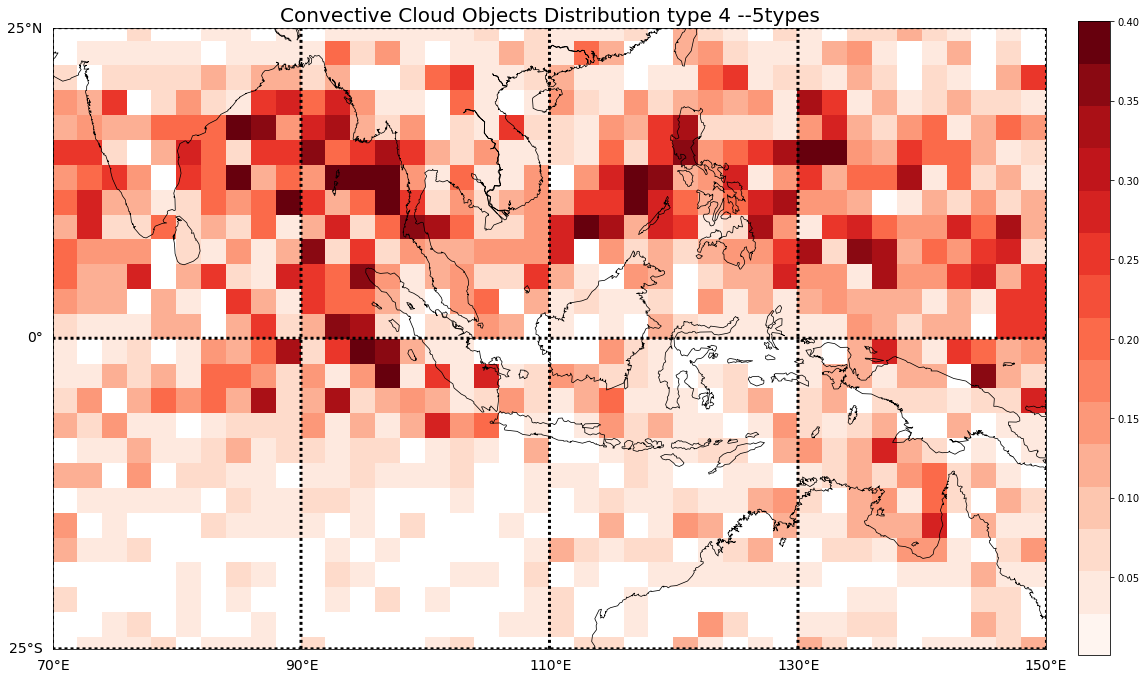

In [65]:
for i in range(0,typenum):
    z = np.zeros((26, 40))
    eventnum=np.sum(hca==i)
    bottom=(1/113447)*100
    print(bottom)
    for j in range(0,113447):
        if hca[j,]==i:
            z[latrange[j,].astype(int),lonrange[j,].astype(int)]= z[latrange[j,].astype(int),lonrange[j,].astype(int)]+1
    print(sum(z))    
    fig = plt.figure(figsize=(16,12)) 
    m = Basemap(llcrnrlon=70., urcrnrlon=150., llcrnrlat=-25., urcrnrlat=25.,resolution='l')
    m.drawcoastlines(linewidth=0.75)
    #m.drawparallels(np.arange(-100., 120., 25.), labels=[1, 0, 0, 0])
    m.drawparallels(np.arange(-100., 120., 25.), labels=[1, 0, 0, 0], linewidth=3.0, color='k', fontsize=14)
    m.drawmeridians(np.arange(-170., 171., 20.), labels=[0, 0, 0, 1], linewidth=3.0, color='k', fontsize=14)
    x = np.arange(70,152,2)
    y = np.arange(-26,28,2)
    cmap2 = cm.get_cmap("Reds",lut=15)
    cmap2.set_under("white")
    m.pcolormesh(x,y,(z*100)/eventnum,cmap=cmap2,vmin=bottom,vmax=0.4)
#cbar_ax = fig.add_axes([0.99, 0.98, 0.5, 0.5])
    plt.colorbar(fraction=0.03, pad=0.03)
    plt.title('Convective Cloud Objects Distribution type {0} --5types'.format(i), fontsize=20)
    plt.tight_layout()
    #plt.savefig('7type_type_{0}_1.png'.format(i),dpi=250)

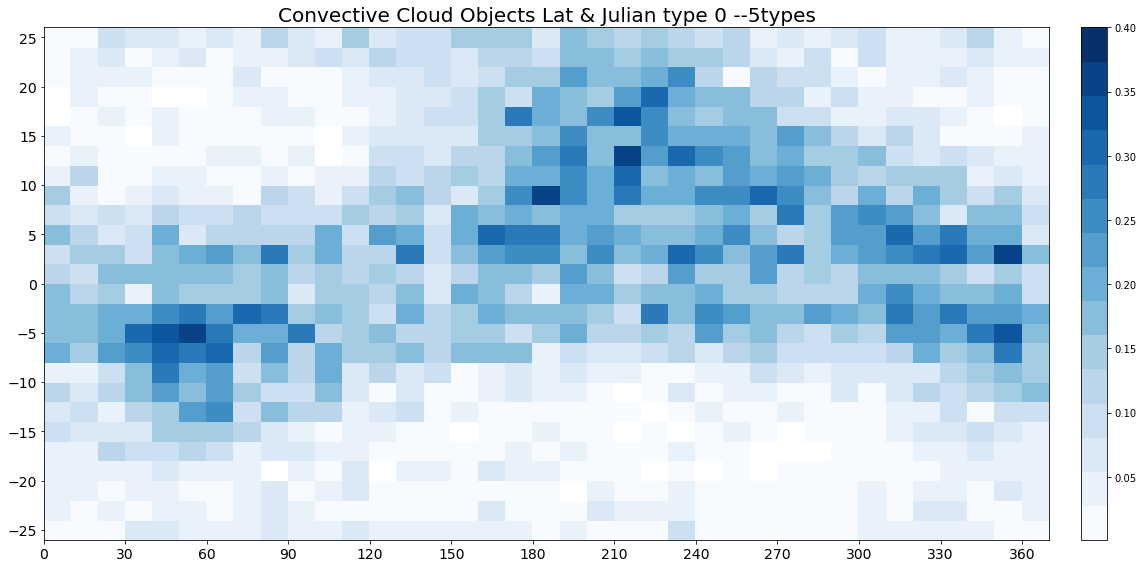

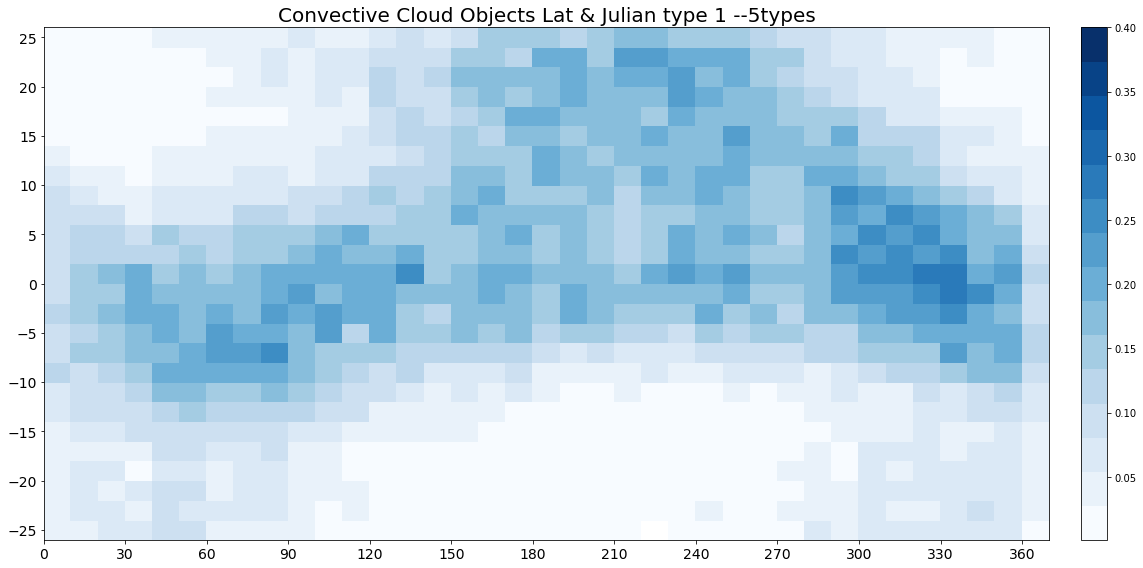

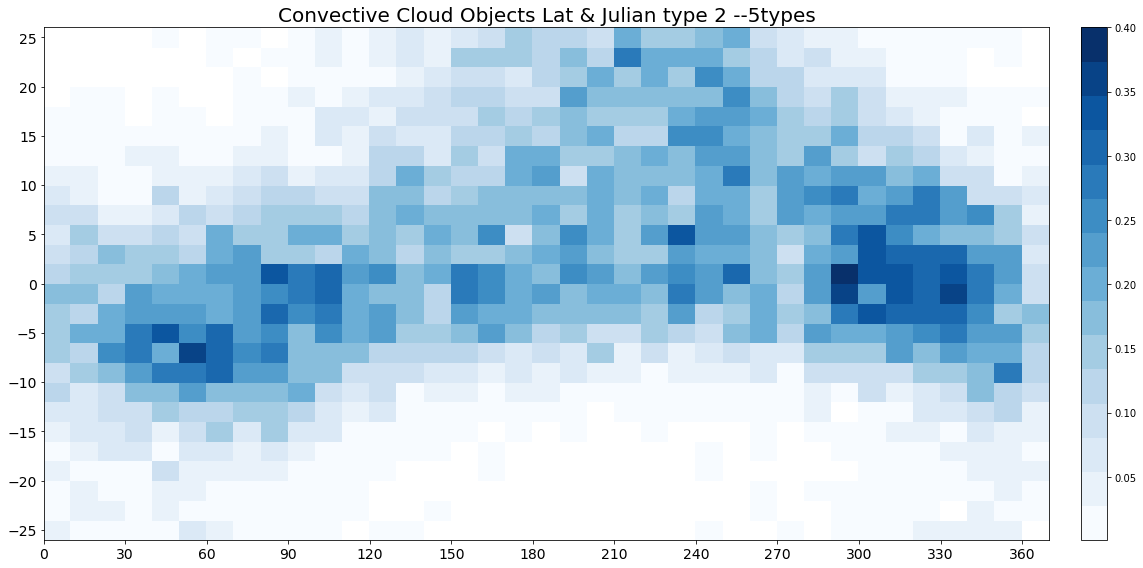

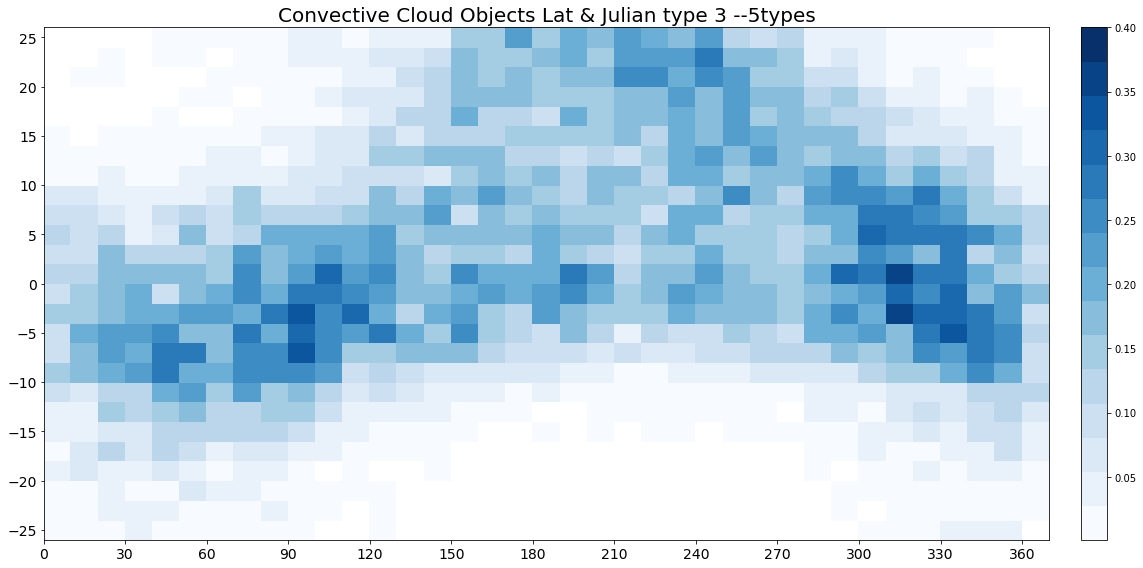

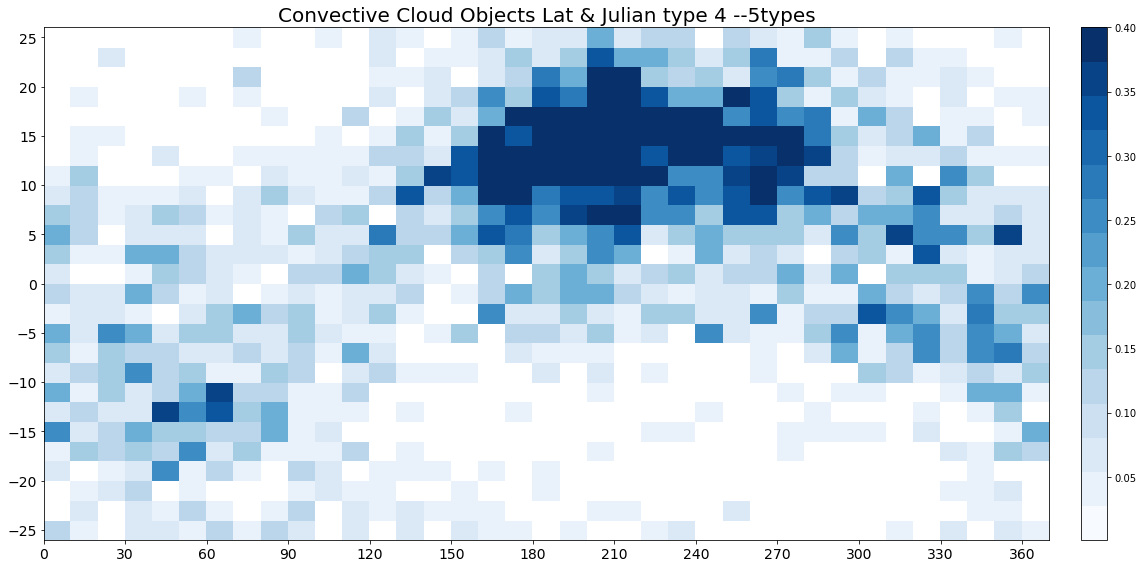

In [83]:
for i in range(0,typenum):
    z = np.zeros((26, 37))
    eventnum=np.sum(hca==i)
    bottom=(1/113447)*100
    #print(bottom)
    for j in range(0,113447):
        if hca[j,]==i:
            z[latrange[j,].astype(int),dayrange[j,].astype(int)]= z[latrange[j,].astype(int),dayrange[j,].astype(int)]+1
    #print(sum(z))    
    fig = plt.figure(figsize=(16,8)) 
    x = np.arange(0,380,10)
    #print(x)
    y = np.arange(-26,28,2)
    cmap2 = cm.get_cmap("Blues",lut=15)
    cmap2.set_under("white")
    plt.pcolormesh(x,y,(z*100)/eventnum,cmap=cmap2,vmin=bottom,vmax=0.4)
#cbar_ax = fig.add_axes([0.99, 0.98, 0.5, 0.5])
    plt.colorbar(fraction=0.03, pad=0.03)
    ax = np.arange(0,370,30)
    ay = np.arange(-25,28,5)
    plt.xticks(ax,fontsize=14)
    plt.yticks(ay,fontsize=14)
    plt.title('Convective Cloud Objects Lat & Julian type {0} --5types'.format(i), fontsize=20)
    plt.tight_layout()
    plt.savefig('Julian_5type_type_{0}_1.png'.format(i),dpi=250)

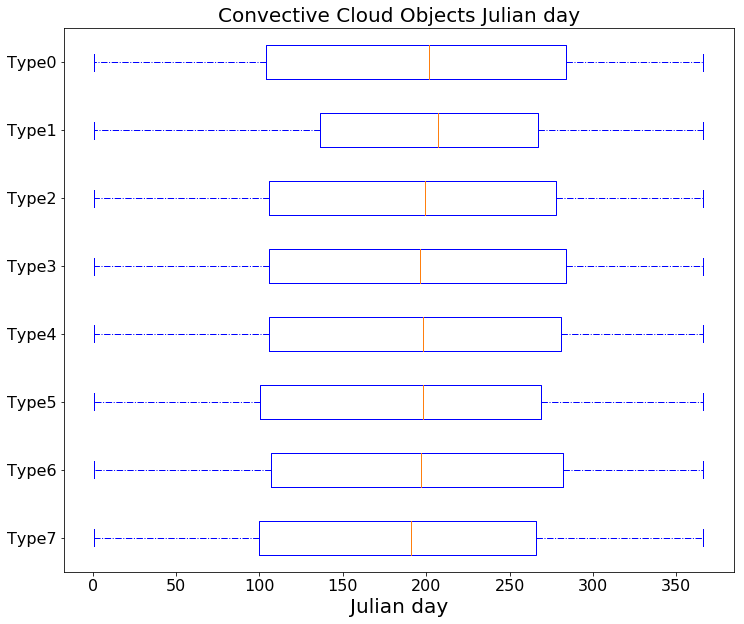

In [54]:
fig = plt.figure(figsize=(12,10)) 
draw = np.zeros((113447, 1))
k=1
for j in range(0,113447):
    draw[j,0]=kkk[j,k]
#vertical data = [draw[hca==0,0], draw[hca==1,0], draw[hca==2,0],draw[hca==3,0], draw[hca==4,0]]
data = [draw[hca==7,0],draw[hca==6,0],draw[hca==5,0],draw[hca==4,0], draw[hca==3,0], draw[hca==2,0],draw[hca==1,0], draw[hca==0,0]]
c="blue"
plt.boxplot(data,vert=False,widths=0.5,boxprops=dict(color=c),whiskerprops=dict(color=c,linestyle='-.'),capprops=dict(color=c))
plt.title('Convective Cloud Objects Julian day', fontsize=20)
plt.xlabel('Julian day',fontsize=20)
#plt.ylabel('$Km^2$',fontsize=20)
#plt.yticks(np.arange(1,6), ['Type0', 'Type1', 'Type2','Type3','Type4'],fontsize=16)
plt.yticks(np.arange(1,9), ['Type7','Type6','Type5','Type4', 'Type3', 'Type2','Type1','Type0'],fontsize=16)
plt.xticks(fontsize=16)
plt.savefig('boxplot_julian',dpi=250)